<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Setup" data-toc-modified-id="Setup-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Setup</a></span></li><li><span><a href="#Compare-against-PRECISE" data-toc-modified-id="Compare-against-PRECISE-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Compare against PRECISE</a></span><ul class="toc-item"><li><span><a href="#Identify-new-components" data-toc-modified-id="Identify-new-components-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Identify new components</a></span><ul class="toc-item"><li><span><a href="#Component-11" data-toc-modified-id="Component-11-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Component 11</a></span></li></ul></li><li><span><a href="#Investigate-component-weightings" data-toc-modified-id="Investigate-component-weightings-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Investigate component weightings</a></span></li></ul></li></ul></div>

**This notebook is only relevant if you are appending E. coli data to PRECISE**

# Setup

In [1]:
import sys
sys.path.append('../')

from matplotlib_venn import venn2
import pandas as pd
from tqdm import tqdm_notebook as tqdm

from icaviz.plotting import *

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [5]:
DATA_DIR = '../data/featureCounts_data2/'
PRECISE_DIR = '../data/precise_data/'
OLD_PRECISE2_DIR = '../data/precise2_data/'
GENE_DIR = '../data/annotation/'

In [3]:
precise2_component_info = pd.read_csv(DATA_DIR+'component_info.csv', index_col=0)
precise2 = load_data(X=DATA_DIR+'log_tpm_qc.csv',
                     S=DATA_DIR+'S.csv',
                     A=DATA_DIR+'A.csv',
                     metadata=DATA_DIR+'metadata_qc.csv',
                     annotation=GENE_DIR+'gene_info.csv',
                     trn=GENE_DIR+'TRN.csv',
                     cutoff = 600) # Get correct cut-off score from 3_estimate_thresholds

../icaviz/load.py:350: UserWarning: Genes missing annotations: b0012, b0056, b0057, b4726, b4727, b4728, b0240, b4710, b4709, b4587, b4729, b0282, b4730, b0322, b4579, b4731, b4580, b4732, b0502, b0542, b4733, b0553, b0562, b4734, b4581, b4735, b4736, b4723, b4737, b4490, b1142, b1149, b4738, b4739, b4491, b4521, b4740, b1228, b4573, b4711, b4741, b4742, b1318, b4524, b4743, b4570, b4744, b4492, b4493, b4745, b1459, b1470, b1471, b4746, b4747, b1506, b4696, b1543, b4748, b4749, b4724, b4750, b4534, b4494, b4751, b4752, b4495, b4496, b4582, b4571, b4498, b2092, b2115, b2139, b2190, b4604, b4605, b4725, b2641, b4644, b2649, b2681, b4610, b2850, b2854, b2855, b2858, b2862, b4753, b2891, b4754, b2941, b4658, b4755, b3036, b4756, b3046, b4569, b3268, b3423, b3443, b4612, b4660, b3504, b4615, b3643, b3681, b3682, b4757, b4488, b3777, b3782, b3808, b4038, b4583, b4223, b4575, b4623, b4308, b4720, b4721, b4722, b4715, b4584
  warnings.warn('Genes missing annotations: {}'.format(missing_genes))

In [6]:
old_precise_component_info = pd.read_csv(OLD_PRECISE2_DIR+'component_info.csv', index_col=0)
old_precise2 = load_data(X=OLD_PRECISE2_DIR+'log_tpm_qc.csv',
                     S=OLD_PRECISE2_DIR+'S.csv',
                     A=OLD_PRECISE2_DIR+'A.csv',
                     metadata=OLD_PRECISE2_DIR+'metadata_qc.csv',
                     annotation=GENE_DIR+'gene_info.csv',
                     trn=GENE_DIR+'TRN.csv',
                     cutoff = 525, names=old_precise_component_info['name']) # Get correct cut-off score from 3_estimate_thresholds

../icaviz/load.py:350: UserWarning: Genes missing annotations: b0012, b0056, b0057, b4726, b4727, b4728, b4710, b4709, b4729, b0282, b4730, b0322, b4731, b4732, b0470_1, b0470_2, b0470_3, b0484_1, b0484_2, b0484_3, b0502, b4733, b0562, b4734, b4581, b4735, b4736, b4723, b4737, b4490, b1142, b1149, b4738, b4739, b4491, b4521, b4740, b1228, b4573, b4711, b4741, b4742, b1318, b4524, b4743, b4744, b4493, b4745, b1459, b1470, b1471, b4746, b4747, b1506, b4696, b1543, b4748, b4749, b4724, b4750, b4534, b4494, b4751, b4752, b4495, b4496, b2092, b2115, b2139, b4604, b4605, b4725, b2641, b4644, b2649, b2681, b4610, b2850, b2854, b2855, b2858, b2862, b4753, b4754, b2941, b4658, b4755, b3036, b4756, b3268, b3423, b4612, b4660, b4615, b3643, b3681, b3682, b4757, b4488, b3777, b3782, b3808, b4038, b4583, b4223, b4575, b4308, b4720, b4721, b4722, b4715, b4584
  warnings.warn('Genes missing annotations: {}'.format(missing_genes))


In [7]:
enrich = pd.read_csv(PRECISE_DIR+'curated_enrichments.csv')
names = enrich['name'].tolist()
precise = load_data(X=PRECISE_DIR+'log_tpm.csv',
                     S=PRECISE_DIR+'S.csv',
                     A=PRECISE_DIR+'A.csv',
                     metadata=PRECISE_DIR+'metadata.csv',
                     annotation=GENE_DIR+'gene_info.csv',
                     trn=GENE_DIR+'TRN.csv',
                     cutoff = 550,names=names)

## Automatically Create Raw Enrichments

This section only needs to be run once; if component_info.csv exists already in the data directory, then this automated initial step has been taken, and that file should be consulted for further manual annotation

In [14]:
dot,links = compare_ica(old_precise2.S,precise2.S,cutoff=0.5)

In [12]:
component_info_df = pd.DataFrame(columns=[
    'component', 'name', 'TF', 'log_odds', 'f1score', 'pvalue',
    'precision', 'recall', 'TP', 'n_genes', 'n_tf', 'Regulator',
    'Function', 'Category', 'threshold', 'PRECISE_name'
])

for component_idx in tqdm(range(precise2.S.shape[1])):
    component_info_df.loc[component_idx, 'component'] = component_idx
    
    precise_idx_tup_listed = [tup for tup in links if int(tup[1]) == component_idx]
    if len(precise_idx_tup_listed) == 1:
        precise_name = precise_idx_tup_listed[0][0]
        component_info_df.loc[component_idx, 'PRECISE_name'] = precise_name
        precise_enrich_row = old_precise_component_info[old_precise_component_info['name'] == precise_name]
        component_info_df.loc[component_idx, 'Function'] = precise_enrich_row['Function'].values[0]
        component_info_df.loc[component_idx, 'Category'] = precise_enrich_row['Category'].values[0]
    
    component_info_df.loc[component_idx, 'threshold'] = precise2.thresholds[component_idx]
    
    genes = precise2.show_enriched(component_idx).index
    component_info_df.loc[component_idx, 'n_genes'] = len(genes)
    
    all_genes = precise2.X.index
    enrichment_df = compute_enrichments(genes, all_genes, precise2.trn, max_tfs = 1, fdr_rate=1e-5)
    if enrichment_df.shape[0] > 0:
        tf_name = enrichment_df.index[0]
        component_info_df.loc[component_idx, 'Regulator'] = tf_name
        component_info_df.loc[component_idx, 'log_odds'] = enrichment_df.loc[tf_name, 'log_odds']
        component_info_df.loc[component_idx, 'pvalue'] = enrichment_df.loc[tf_name, 'pvalue']
        component_info_df.loc[component_idx, 'recall'] = enrichment_df.loc[tf_name, 'recall']
        component_info_df.loc[component_idx, 'precision'] = enrichment_df.loc[tf_name, 'precision']
        component_info_df.loc[component_idx, 'TP'] = enrichment_df.loc[tf_name, 'TP']
        component_info_df.loc[component_idx, 'f1score'] = enrichment_df.loc[tf_name, 'f1score']
        component_info_df.loc[component_idx, 'n_tf'] = enrichment_df.loc[tf_name, 'n_tf']

/Users/cam/.virtualenvs/precise2/lib/python3.7/site-packages/ipykernel_launcher.py:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  import sys


In [13]:
component_info_df.to_csv('../data/featureCounts_data2/component_info.csv')

## Identify new components

In [406]:
COMPONENT_NAME = 201

In [407]:
precise2.show_enriched(COMPONENT_NAME)

,comp,product,gene_name,operon,length,TF
Geneid,,,,,,
b3509,-0.173615,HdeB monomer,hdeB,"hdeA,hdeB,yhiD",327.0,"Sigma38,fliZ,gadE,gadW,gadX,gcvB,h-NS,lrp,marA..."
b3510,-0.134178,"HdeA monomer, chaperone active form",hdeA,"hdeA,hdeB,yhiD",333.0,"Sigma38,fliZ,gadE,gadW,gadX,h-NS,lrp,marA,oxyS..."
b1625,0.114409,H-NS- and StpA-binding protein,cnu,cnu,216.0,gadE
b3513,0.145857,MdtEF-TolC multidrug efflux pump - membrane fu...,mdtE,"gadE,gadF,mdtE,mdtF",1158.0,"Sigma38,Sigma70,crp,evgA,fliZ,gadE,gadW,gadX,h..."
b3514,0.170220,MdtEF-TolC multidrug efflux pump - permease su...,mdtF,"gadE,gadF,mdtE,mdtF",3114.0,"Sigma38,Sigma70,crp,evgA,fliZ,gadE,gadW,gadX,h..."
b3491,0.217162,inner membrane protein with a role in acid res...,yhiM,yhiM,1053.0,"Sigma38,gadE,gadE;rcsB,h-NS,oxyS"


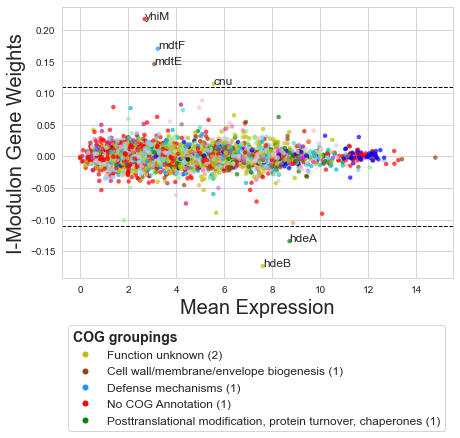

In [408]:
plot_genes(precise2, COMPONENT_NAME, labels=True, adjust=False)

[(<matplotlib.axes._subplots.AxesSubplot at 0x1462d2650>,
  <matplotlib.axes._subplots.AxesSubplot at 0x1463cbd10>)]

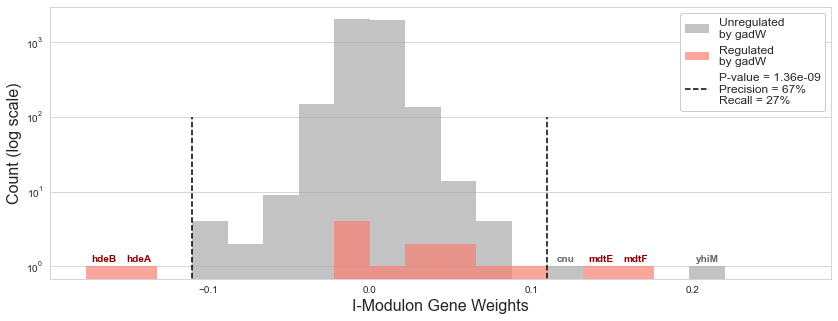

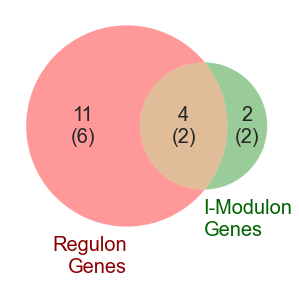

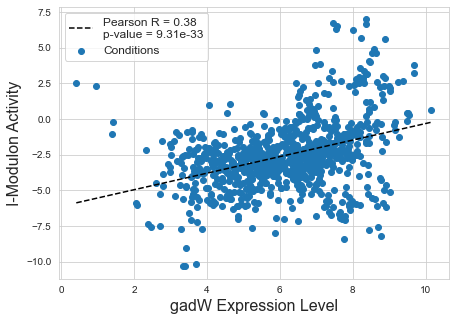

In [409]:
plot_regulon(precise2, COMPONENT_NAME)

In [334]:
genes = precise2.show_enriched(COMPONENT_NAME).index
all_genes = precise2.X.index
enrich_df = compute_enrichments(genes, all_genes, precise2.trn, max_tfs = 2, fdr_rate=1e-5)
enrich_df

,log_odds,pvalue,recall,precision,TP,qvalue,f1score,n_tf


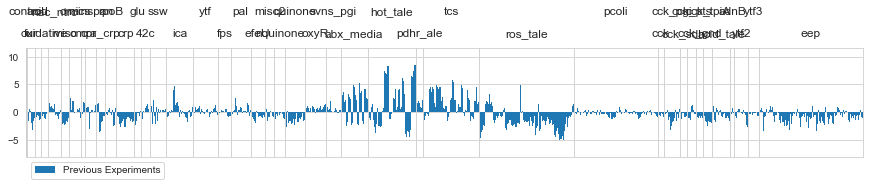

In [396]:
plot_samples_bar(precise2, COMPONENT_NAME)